In [ ]:
#Q:Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

In [17]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans # kmeans clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN #dbscan clustering
import scipy.cluster.hierarchy as shc #hirarchial clustering

In [18]:
# importing dataset
Airlines = pd.read_excel("D:/DATA SCIENCE/1. Data Scientist/Assignment/18.6.1 clustering/EastWestAirlines.xlsx", sheet_name='data')

In [19]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [20]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [21]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [22]:
Airlines.shape

(3999, 12)

In [23]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
df_norm_Air = norm_func(Airlines.iloc[:,:])
df_norm_Air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [25]:
# 1. kmeans clustering

In [26]:
from scipy.spatial.distance import cdist 
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm_Air)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm_Air.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm_Air.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)

Inertia :  241.70152757242926
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0x1e34d6541c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

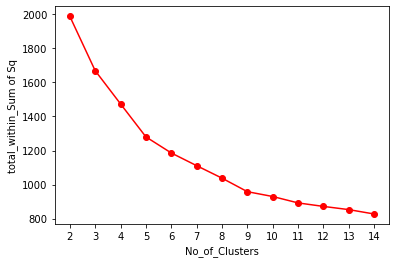

In [27]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [28]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=10) 
model1.fit(df_norm_Air)

KMeans(n_clusters=10)

In [41]:
model1.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model1.labels_)  # converting numpy array into pandas series object 
Airlines['clust']=md 

In [42]:
# creating a  new column and assigning it to new column 
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\l

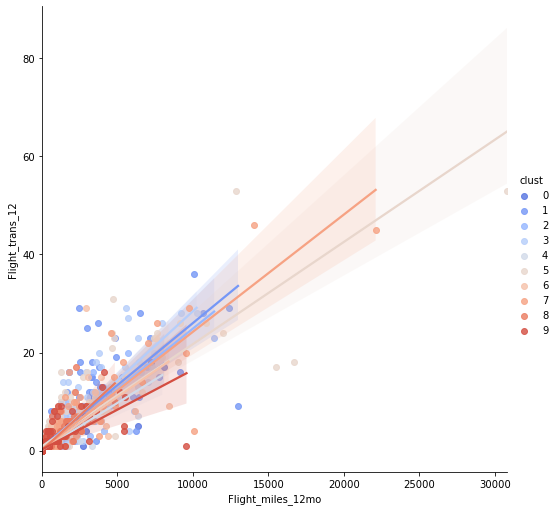

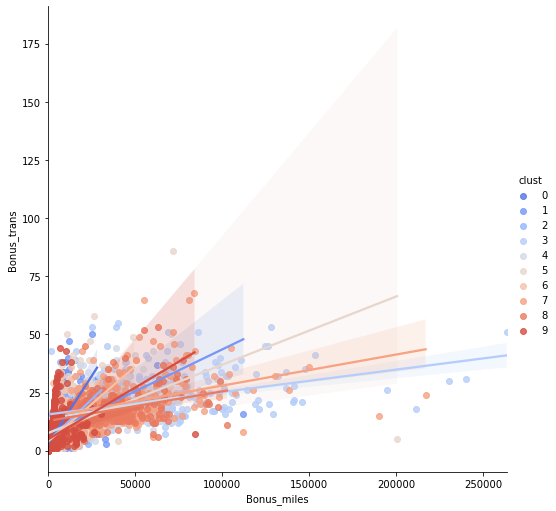

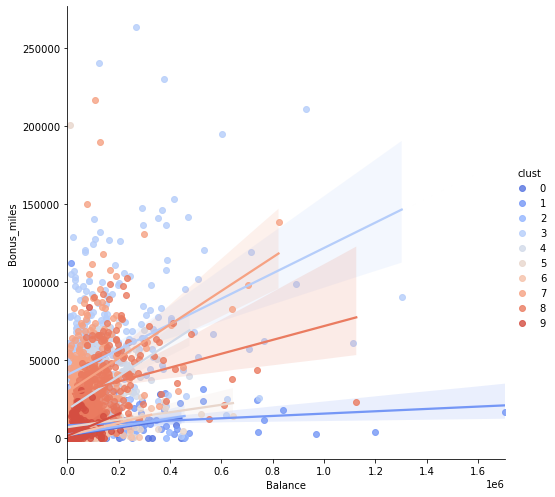

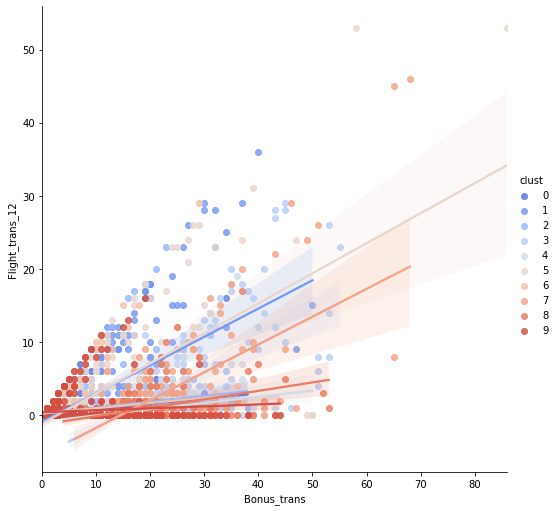

In [30]:
sns.lmplot('Flight_miles_12mo', 'Flight_trans_12', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('Bonus_miles', 'Bonus_trans', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('Balance', 'Bonus_miles', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('Bonus_trans', 'Flight_trans_12', data=Airlines, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
plt.show()

In [31]:
# 2. hirarchial clustering

In [32]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(Airlines.iloc[:,0:14])

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

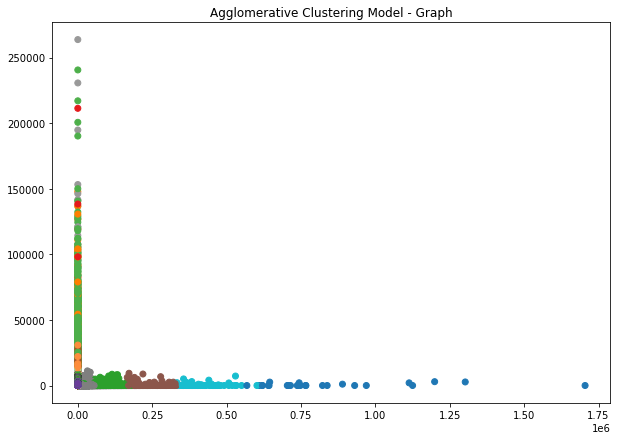

In [33]:
plt.figure(figsize=(10,7))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model2.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model2.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model2.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model2.labels_, cmap='Paired')
plt.show()

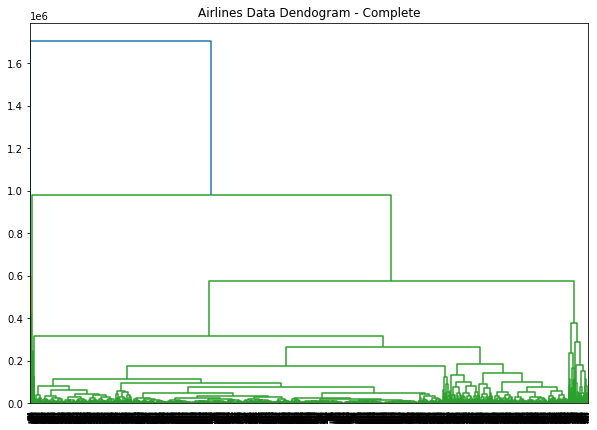

In [34]:
plt.figure(figsize=(10,7))
plt.title("Airlines Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(Airlines.iloc[:,:13], method='complete'))

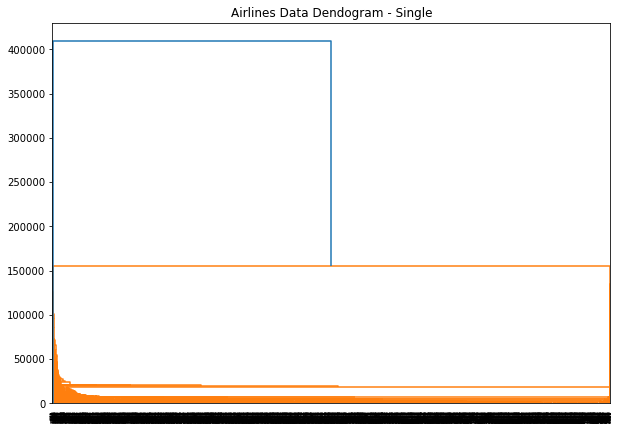

In [35]:
plt.figure(figsize=(10,7))
plt.title("Airlines Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(Airlines.iloc[:,:13], method='single'))

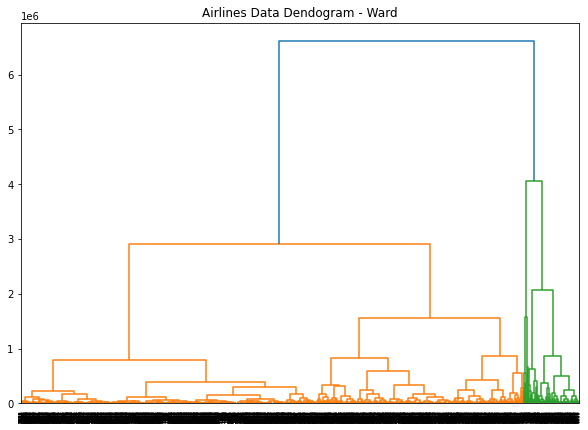

In [36]:
plt.figure(figsize=(10, 7))
plt.title("Airlines Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(Airlines.iloc[:,:13], method='ward'))

In [43]:
# 3. DBSCAN clustering

In [44]:
model4 = DBSCAN(eps=0.30, min_samples=9)
model4.fit_predict(Airlines.iloc[:,:13])

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

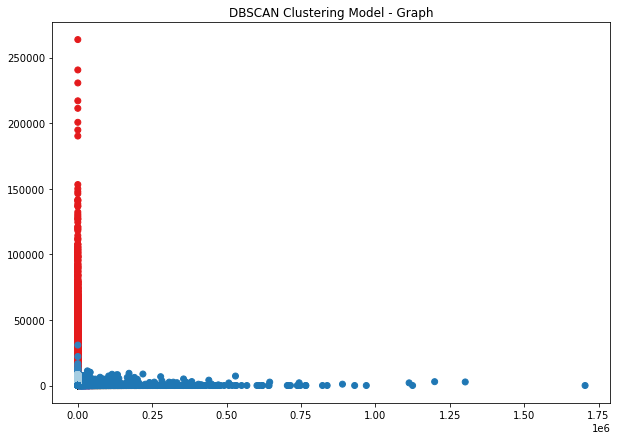

In [45]:
plt.figure(figsize=(10,7))
plt.title("DBSCAN Clustering Model - Graph")
plt.scatter(Airlines.iloc[:,1], Airlines.iloc[:,2], c=model4.labels_, cmap='tab10')
plt.scatter(Airlines.iloc[:,3], Airlines.iloc[:,4], c=model4.labels_, cmap='rainbow')
plt.scatter(Airlines.iloc[:,5], Airlines.iloc[:,6], c=model4.labels_, cmap='Set1')
plt.scatter(Airlines.iloc[:,7], Airlines.iloc[:,8], c=model4.labels_, cmap='tab20c')
plt.scatter(Airlines.iloc[:,9], Airlines.iloc[:,10], c=model4.labels_, cmap='Paired')
plt.scatter(Airlines.iloc[:,11], Airlines.iloc[:,12], c=model4.labels_, cmap='tab20')
plt.show()